# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
import requests
import json
import api_keys
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime

# create variables for plot label and filename dates
datetoday = datetime.datetime.now().strftime('%d/%m/%y')
datefilename = datetime.datetime.now().strftime('%Y-%m-%d')

# install citypy to utilise below 
from citipy import citipy

'2021-01-10'

## Generate Cities List

In [2]:
#generate cities
# declare counter and max count
ctr = 0
max_ct = 650
city_list = []

while ctr < max_ct:
    # randomise longitude and latitude
    latitude = round(random.uniform(-90.00,90.00),2) 
    longitude = round(random.uniform(-180.00,180.00),2)
    # get city details
    city = citipy.nearest_city(latitude,longitude)

    # prevent duplicate cities in the main list
    if city.city_name not in city_list:
        ctr += 1
        city_list.append(city.city_name)

len(city_list)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initialise set and record number
set_no = 1
record = 0

# initialise URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.weather_api_key}&units=imperial&q="

# maximum number of records requested excluding missing cities
maxData = 500
 # number of record per minute
recsPerMin=50
# successful request counter
recs_fetched = 0
# proc counter
prc_cntr = 0

# initialise city data directory
city_data = {"City":[],
             "Lat":[],
             "Lng":[],
             "Max Temp":[],
             "Humidity":[],
             "Cloudiness":[],
             "Wind Speed":[],
             "Country":[],
             "Date":[]}

print("Beginning Data Retrieval \n--------------------------------------------------------------")
    
for cty_name in city_list:
    # increment for each call even if city does not exist
    response = requests.get(f"{url}{cty_name}").json()

    # maximum of 60 calls per minute, pause for 1 min after 50 calls
    # separate call counter from record counter to prevent exceeding in case missing city > 10
    if prc_cntr == recsPerMin:
        time.sleep(60)
        prc_cntr = 0
        
    if record == 50:
        #reset record number indicator and increment set number
        record = 0
        set_no += 1

    # if city exists online, process and increment counter
    # using if/else instead of try/catch since try catch will mess up with the counters
    if response['cod'] != '404':
        recs_fetched += 1
        record += 1
        print(f"Processing Record {record} of Set {set_no} | {cty_name}")
        
        # load data to lists
        city_data["City"].append(response["name"])
        city_data["Lat"].append(response["coord"]["lat"])
        city_data["Lng"].append(response["coord"]["lon"])
        city_data["Max Temp"].append(response["main"]["temp_max"])
        city_data["Humidity"].append(response["main"]["humidity"])
        city_data["Cloudiness"].append(response["clouds"]["all"])
        city_data["Wind Speed"].append(response["wind"]["speed"])
        city_data["Country"].append(response["sys"]["country"])
        city_data["Date"].append(response["dt"])
    else:
        # have noticed that the variable values do not reflect if the exception is fired
        # this is to ensure that only 50 records are processed per minute regardless
        # if the record exists or not
        prc_cntr += 1 
        print(f"City not found. Skipping...")
        
    prc_cntr += 1
    
    # if max data is reached, break the loop
    if recs_fetched >= maxData:
        break

print (f"-------------------------------------------------------------- \
       \nData Retrieval Complete - {recs_fetched} records fetched \
       \n--------------------------------------------------------------")

Beginning Data Retrieval 
--------------------------------------------------------------
Processing Record 1 of Set 1 | san quintin
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | charters towers
Processing Record 6 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kabinda
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | kargasok
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | weiser
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | ferme-neuve
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | mareeba
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | makakilo city
Processing Record 20 of Set 1 | northam
Processing Record 21 of Set 1 | vaini
Processi

Processing Record 34 of Set 4 | moncton
Processing Record 35 of Set 4 | east london
Processing Record 36 of Set 4 | angoche
Processing Record 37 of Set 4 | teahupoo
Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | pangnirtung
City not found. Skipping...
Processing Record 40 of Set 4 | faya
Processing Record 41 of Set 4 | deputatskiy
Processing Record 42 of Set 4 | sal rei
Processing Record 43 of Set 4 | kysyl-syr
Processing Record 44 of Set 4 | kutum
Processing Record 45 of Set 4 | saint simons
City not found. Skipping...
Processing Record 46 of Set 4 | baruun-urt
Processing Record 47 of Set 4 | todos santos
Processing Record 48 of Set 4 | chapais
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | pierre
Processing Record 1 of Set 5 | ouango
Processing Record 2 of Set 5 | bisira
Processing Record 3 of Set 5 | pevek
City not found. Skipping...
Processing Record 4 of Set 5 | jinchang
Processing Record 5 of Set 5 | nioki
Processing Record 6 of

City not found. Skipping...
Processing Record 25 of Set 8 | el tigre
Processing Record 26 of Set 8 | danane
Processing Record 27 of Set 8 | hirara
Processing Record 28 of Set 8 | jadu
Processing Record 29 of Set 8 | marsh harbour
Processing Record 30 of Set 8 | muzhi
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | comodoro rivadavia
City not found. Skipping...
Processing Record 33 of Set 8 | pyinmana
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | pachino
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | petatlan
Processing Record 39 of Set 8 | acajutla
Processing Record 40 of Set 8 | inhumas
Processing Record 41 of Set 8 | ambanja
Processing Record 42 of Set 8 | hobyo
Processing Record 43 of Set 8 | cambrils
Processing Record 44 of Set 8 | kosum phisai
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | tarko-sale
Processing Record 47 of Set 8 | n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_df = pd.DataFrame(city_data)
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,53.35,79,0,3.78,MX,1610200143
1,Nikolskoye,59.7035,30.7861,12.00,85,40,2.24,RU,1610200144
2,Port Alfred,-33.5906,26.8910,81.00,79,0,7.99,ZA,1610200145
3,Touros,-5.1989,-35.4608,86.00,58,20,16.11,BR,1610200252
4,Charters Towers,-20.1000,146.2667,73.85,89,97,12.28,AU,1610200252


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,18.864233,15.340219,51.216460,71.520000,53.440000,8.413460,1.610200e+09
std,34.273811,91.311905,33.253546,20.186148,40.710553,5.999201,1.009643e+02
min,-54.800000,-179.166700,-31.160000,9.000000,0.000000,0.400000,1.610200e+09
25%,-9.621350,-67.520825,28.400000,62.000000,3.000000,4.030000,1.610200e+09
50%,21.023850,19.786800,63.475000,76.000000,72.000000,6.910000,1.610200e+09
75%,46.941725,92.925000,78.800000,87.000000,94.000000,10.952500,1.610200e+09
max,78.218600,179.316700,100.470000,100.000000,100.000000,36.820000,1.610200e+09


In [20]:
#  Get the indices of cities that have humidity over 100%.
# [RS] - I'd prefer to automate the checks :)
weather_df_outliers = []
if weather_df['Humidity'].max() > 100:
    weather_df_outliers = weather_df.loc[weather_df['Humidity'] > 90].index

weather_df_outliers

[]

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[~weather_df.index.isin(weather_df_outliers)]
len(clean_city_data)

500

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### OBSERVATIONS:
* Considering the data to be concentrated more on Northern Latitude there is a close correlation to drop in temperature as the city moves away from the equator. 
* Given the results of the sample, if I am to enhance this analysis I'd rather get the positive and negaive latitude values for a single longitude and ensure that both the positive and negative latitude cities have weather data, then I'll do the analysis and plotting from there.

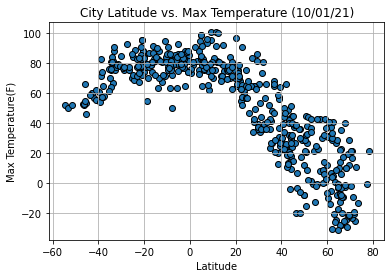

In [108]:
# init axes
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp'] 
# create scatter plot
plt.scatter(x_values,y_values,edgecolors="black")
# add grid
plt.grid()
# add labels
plt.title(f'City Latitude vs. Max Temperature ({datetoday})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
# save figure
plt.savefig(f"../output_data/City Latitude vs. Max Temperature {datefilename}.png")
# print visualisation
plt.show()

## Latitude vs. Humidity Plot

#### OBSERVATIONS:
* For this data there seems to be a concentration of high humidity on the northern latitude although there is not much of a correlation with the acquired dataset. It would be interesting to see an equal amount of citis in the >-40 latitude perhaps it could show more corellation. 

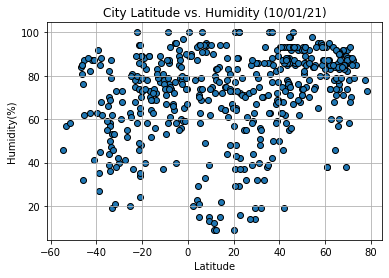

In [109]:
# init axes
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity'] 
# create scatter plot
plt.scatter(x_values,y_values,edgecolors="black")
# add grid
plt.grid()
# add labels
plt.title(f'City Latitude vs. Humidity ({datetoday})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
# save figure
plt.savefig(f"../output_data/City Latitude vs. Humidity {datefilename}.png")
# print visualisation
plt.show()

## Latitude vs. Cloudiness Plot

#### OBSERVATIONS:
* There seems to be a concentration between 70% to 100% cloudiness but not much correlation, would be interesting to compare data from different days or seasons.

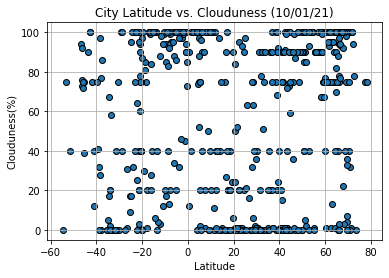

In [110]:
# init axes
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness'] 
# create scatter plot
plt.scatter(x_values,y_values,edgecolors="black")
# add grid
plt.grid()
# add labels
plt.title(f'City Latitude vs. Clouduness ({datetoday})')
plt.xlabel('Latitude')
plt.ylabel('Clouduness(%)')
# save figure
plt.savefig(f"../output_data/City Latitude vs. Clouduness {datefilename}.png")
# print visualisation
plt.show()

## Latitude vs. Wind Speed Plot

#### OBSERVATIONS:
* Again onsidering the data to be concentrated more on Northern Latitude the correlation seepms to be consistent between wind speed and latitude with a high concentration between 0 and 10. One interesting observation in this data is all of the chosen cities seem to have a fair to moderately windy weather and no storms.

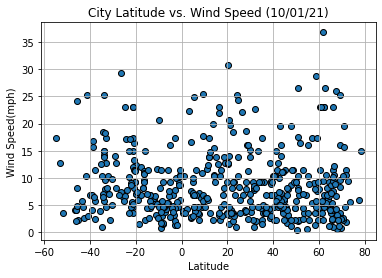

In [111]:
# init axes
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed'] 
# create scatter plot
plt.scatter(x_values,y_values,edgecolors="black")
# add grid
plt.grid()
# add labels
plt.title(f'City Latitude vs. Wind Speed ({datetoday})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
# save figure
plt.savefig(f"../output_data/City Latitude vs. Wind Speed {datefilename}.png")
# print visualisation
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a strong negative correlation between northern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves up further from the equator. 

The r-value is -0.8746247660567169


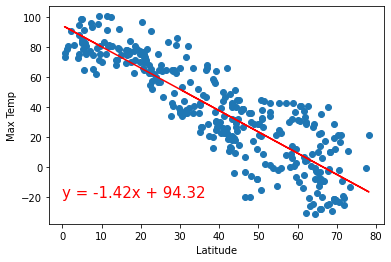

In [50]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Max Temp']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line and equation
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a positive correlation between southern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves closer to the equator.

The r-value is 0.5629158493011578


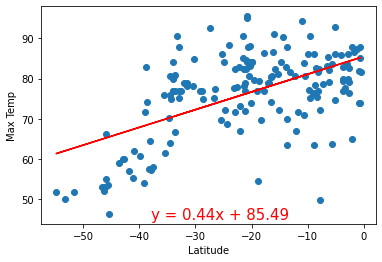

In [62]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Max Temp']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-38,45),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak positive correlation between northern latitude and humidity although on a visual inspection I would say this is more of a zero corellation with concentration of high humidity on cities further north. 

The r-value is 0.3408100359777421


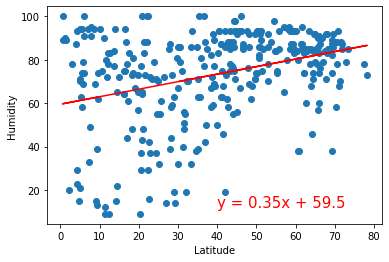

In [66]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Humidity']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,12),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak positive correlation from southern hemisphere latitude vs humidity.

The r-value is 0.26244612506127635


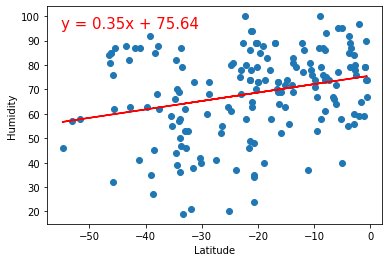

In [72]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Humidity']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation between cloudiness and latitude in the northern hemisphere. 

The r-value is 0.23438919579195808


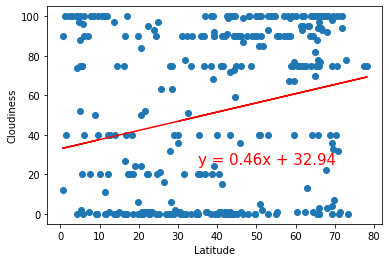

In [74]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Cloudiness']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(35,25),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a strong positive correlation between cloudiness and latitude in the southern hemisphere. 

The r-value is 0.36421224475422104


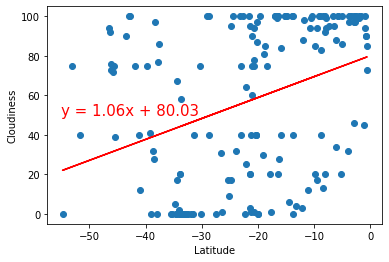

In [77]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Cloudiness']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is almost no correlation between wind speed and latitude in the northern hemisphere. 

The r-value is -0.034863550638722575


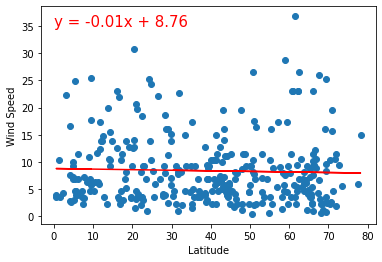

In [79]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Wind Speed']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak negative correlation between wind speed and latitude in the southern hemisphere. 

The r-value is -0.19955718935696048


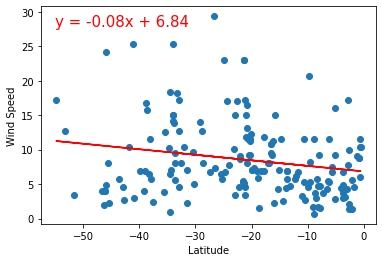

In [92]:
# initialise Axes
x_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] < 0]['Wind Speed']
# calculate line variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# calculate regress values
regress_values = x_values * slope + intercept
# create scatter plot
plt.scatter(x_values,y_values)
# add line
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
# create axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is {rvalue}")
plt.show()